In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras.optimizers import SGD
from keras_vggface.vggface import VGGFace
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import import_ipynb
from convert_Datasets import *

importing Jupyter notebook from convert_Datasets.ipynb


In [5]:
face = pd.read_csv('icml_face_data.csv')
face.head()

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [14]:
face.emotion.unique()

4


In [4]:
face['Emotion_Name'] = pd.Categorical.from_codes(face.emotion, categories= ['Angry','Disgust', 'Fear', 'Happy', 'Sad', 'Suprise', 'Neutral'])

face.head()

,emotion,Usage,pixels,Emotion_Name
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Angry
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...,Angry
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...,Fear
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Sad
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Neutral


In [5]:
face.rename(columns={' Usuage': 'Usuage', ' pixels': 'pixels'}, inplace=True)

In [2]:
label_emotion = {0:'Anger', 1:'Disgust', 2:'Fear', 3:'Happiness', 4: 'Sadness', 5: 'Surprise', 6: 'Neutral'} 

C:\Users\14108\AppData\Local\Temp\ipykernel_14456\2258244848.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


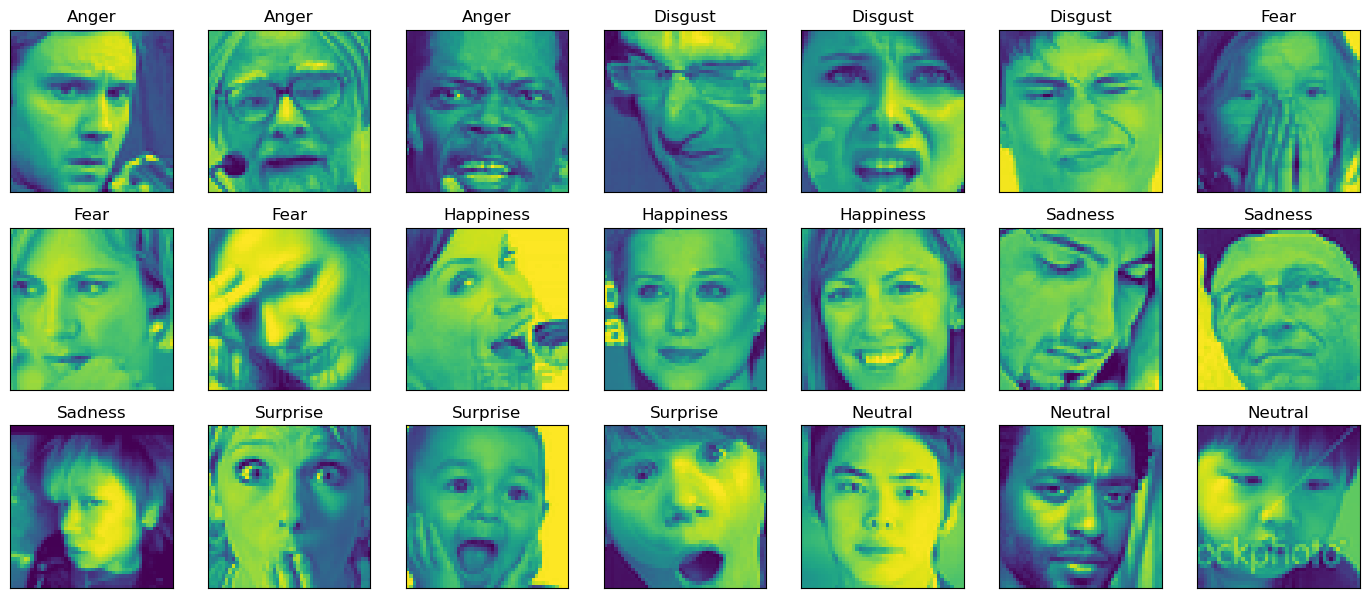

In [7]:
fig = plt.figure(1, (14, 14))
k = 0
pic_width =48
pic_height = 48
for label in sorted(face.emotion.unique()):
    for j in range(3):
        px = face[face.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(pic_width, pic_height).astype('float32')
        k += 1
        ax = plt.subplot(7, 7, k)
        ax.imshow(px)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(label_emotion[label])
        plt.tight_layout()

In [8]:
img_info = face.pixels.apply(lambda x : np.array(x.split(' ')).reshape(pic_width, pic_height).astype('float32'))

img_info = np.stack(img_info, axis=0)

img_info.shape
print("This dataset has ", img_info.shape[0], " images with", img_info.shape[1], " x ", img_info.shape[2], "dimensions")

This dataset has  35887  images with 48  x  48 dimensions


In [3]:
#Convert pixel information to actual .jpg images
data_download()

#importing training and validation data 
train_label = pd.read_csv('labels/traininglabel.csv')
valid_label = pd.read_csv('labels/publictestlabel.csv')
test_label = pd.read_csv('labels/privatetestlabel.csv') 

def append_ext(fn):
    return str(fn)+".jpg"

train_label["id"]=train_label["id"].apply(append_ext)
valid_label["id"]=valid_label["id"].apply(append_ext)
test_label["id"]=test_label["id"].apply(append_ext)
    
#Converting emotion labels to string
train_label['emotion'] = train_label['emotion'].map(label_emotion)
valid_label['emotion'] = valid_label['emotion'].map(label_emotion)
test_label['emotion'] = test_label['emotion'].map(label_emotion)
    
# Define our example directories and files
train_dir = 'datasets/Training'
valid_dir = 'datasets/PublicTest'
test_dir = 'datasets/PrivateTest'

#Augumented our trainging set
train_datagen = ImageDataGenerator(rescale = 1./255., 
                            rotation_range = 40, 
                            width_shift_range = 0.2,
                            height_shift_range = 0.3,
                            shear_range = 0.3,
                            zoom_range = 0.3,
                            horizontal_flip = True,
                            fill_mode ='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255. )
    
# Flow training images in batches of 32 using train_datagen generator
train_generator=train_datagen.flow_from_dataframe(dataframe=train_label,
                                                     directory=train_dir,
                                                     x_col="id",
                                                     y_col="emotion",
                                                     target_size=(96,96),
                                                     batch_size=32,
                                                     seed=32,
                                                     shuffle=True,
                                                     class_mode="categorical",
                                                     color_mode='rgb')
    
# Flow validation images in batches of 32 using validation_datagen generator
validation_generator=validation_datagen.flow_from_dataframe(dataframe=valid_label,
                                                      directory=valid_dir,
                                                      x_col="id",
                                                      y_col="emotion",
                                                      target_size=(96,96),
                                                      batch_size=32,
                                                      seed=32,
                                                      shuffle=True,
                                                      class_mode="categorical",
                                                      color_mode='rgb')

 # Flow validation images in batches of 32 using test_datagen generator
test_generator=test_datagen.flow_from_dataframe(dataframe=test_label,
                                                directory=test_dir,
                                                x_col="id",
                                                y_col=None,
                                                target_size=(96,96),
                                                batch_size=32,
                                                seed=32,
                                                shuffle=False,
                                                class_mode=None,
                                                color_mode='rgb')

preparing
importing csv file
converting set: Training...
Here is length of samples: 28709
And emotion of last image: emotion                                                    0
pixels     254 254 254 254 254 249 255 160 2 58 53 70 77 ...
Usage                                             PublicTest
Name: 28709, dtype: object
converting set: PublicTest...
Here is length of samples: 3589
And emotion of last image: emotion                                                    0
pixels     254 254 254 254 254 249 255 160 2 58 53 70 77 ...
Usage                                             PublicTest
Name: 28709, dtype: object
converting set: PrivateTest...
Here is length of samples: 3589
And emotion of last image: emotion                                                    0
pixels     254 254 254 254 254 249 255 160 2 58 53 70 77 ...
Usage                                             PublicTest
Name: 28709, dtype: object
Found 28708 validated image filenames belonging to 7 classes.


C:\Users\14108\anaconda3\Lib\site-packages\keras\preprocessing\image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="id". These filename(s) will be ignored.
  warnings.warn(


Found 3588 validated image filenames belonging to 7 classes.


C:\Users\14108\anaconda3\Lib\site-packages\keras\preprocessing\image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="id". These filename(s) will be ignored.
  warnings.warn(


Found 3588 validated image filenames.


C:\Users\14108\anaconda3\Lib\site-packages\keras\preprocessing\image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="id". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
#Barrowed code for using VGGface. First CNN to use on model (plan on using four differenet ones in total to compare results)

#custom parameters
nb_class = 7
hidden_dim = 1024

#Creating a VGGFace model instance.
vgg_model = VGGFace(include_top=False, input_shape=(96, 96, 3))

#Use the architecture of the VGGFace and append a fully connected layer with 1024 neurons before the final classification using softmax.
last_layer = vgg_model.get_layer('pool5').output
x = layers.Flatten()(last_layer)
x = layers.Dense(hidden_dim, activation='relu', name='fc7')(x)
x = layers.Dense(nb_class, activation='softmax', name='fc8')(x)
custom_vgg_model = Model(vgg_model.input, x)

#Printing the model summary
custom_vgg_model.summary()

# Training the model with fer2013 data.
custom_vgg_model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.0001),
              metrics=['accuracy'])

history = custom_vgg_model.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 897,
            epochs = 100,
            validation_steps = 897,
            verbose = 2,
            callbacks=callbacks)